In [ ]:
# Loading the dirve helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# opening folder where data is present
!ls "/content/drive/My Drive"


 20200709_214346.jpg	       'IndiDrive (1)'
'6.2 Collab Code.zip'	       'IndiDrive (2)'
'Bird Speciees Dataset'        'IndiDrive (3)'
 bird_species.h5	       'IndiDrive (4)'
 Classroom		        lv_0_20230625194245.mp4
'Colab Notebooks'	       'New Document.pdf'
 IMG_20211207_092111.jpg        people
 IMG_20220108_111349.jpg        People_images
'IMG_20220116_141411 (1).jpg'   Sharer.pw
 IMG_20220116_141411.jpg        spam.csv
 IMG_20230809_015109.jpg       'Untitled 4_720p.mp4'
 IndiDrive


In [ ]:
!ls "/content/drive/My Drive/people"

Image10.jpg  Image26.jpg  Image41.jpg  Image57.jpg  Image72.jpg  Image88.jpg
Image11.jpg  Image27.jpg  Image42.jpg  Image58.jpg  Image73.jpg  Image89.jpg
Image12.jpg  Image28.jpg  Image43.jpg  Image59.jpg  Image74.jpg  Image8.jpg
Image13.jpg  Image29.jpg  Image44.jpg  Image5.jpg   Image75.jpg  Image90.jpg
Image14.jpg  Image2.jpg   Image45.jpg  Image60.jpg  Image76.jpg  Image91.jpg
Image15.jpg  Image30.jpg  Image46.jpg  Image61.jpg  Image77.jpg  Image92.jpg
Image16.jpg  Image31.jpg  Image47.jpg  Image62.jpg  Image78.jpg  Image93.jpg
Image17.jpg  Image32.jpg  Image48.jpg  Image63.jpg  Image79.jpg  Image94.jpg
Image18.jpg  Image33.jpg  Image49.jpg  Image64.jpg  Image7.jpg	 Image95.jpg
Image19.jpg  Image34.jpg  Image4.jpg   Image65.jpg  Image80.jpg  Image96.jpg
Image1.jpg   Image35.jpg  Image50.jpg  Image66.jpg  Image81.jpg  Image97.jpg
Image20.jpg  Image36.jpg  Image51.jpg  Image67.jpg  Image82.jpg  Image98.jpg
Image21.jpg  Image37.jpg  Image52.jpg  Image68.jpg  Image83.jpg  Image99.jpg
I

In [ ]:
# Importing dependecies

from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np


In [ ]:
#location of image
paths = "/content/drive/My Drive/People_images"

In [ ]:
# normalize images
train_datagen = ImageDataGenerator(rescale=1./255)

#resize all images to same size
train = train_datagen.flow_from_directory(paths,
                                          target_size=(256,256),
                                          batch_size = 100,
                                          class_mode=None)

Found 99 images belonging to 1 classes.


In [ ]:
# converting rgb to lab fromat
X = []
Y = []
for img in train[0]:
  try:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128) # A and B in lab ranges from -128 to 128 now it ranges form -1 to 1
  except:
    print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) # dimension of X and Y must be same
print(X.shape)

(99, 256, 256, 1)


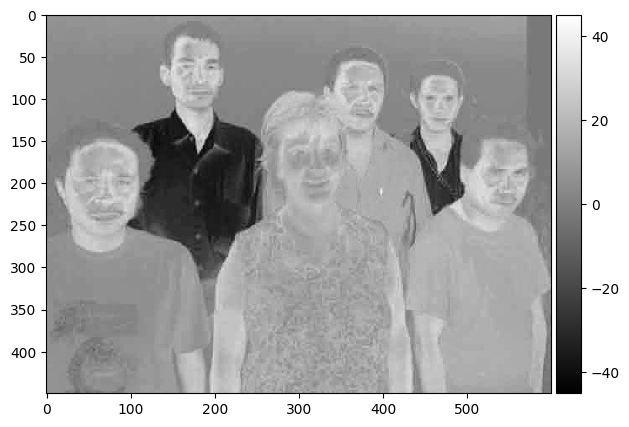

In [ ]:
# checking image lab
from skimage.io import imshow
img=load_img('/content/drive/My Drive/People_images/people/Image10.jpg')
lab = rgb2lab(img)
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]
imshow(B,cmap='gray')

In [ ]:
# creating model

## Encoder
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2, input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))

## Decoder
# Note : We use tanh in last layer because our value of A and B ranges from -1 to 1
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(Conv2D(2,(3,3), activation='tanh', padding='same'))
model.add(UpSampling2D((2,2)))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 512)      

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=5, batch_size=16)
model.save('colorize_autoencoder.model')

Epoch 1/5
6/6 [==============================] - 141s 21s/step - loss: 0.2139 - accuracy: 0.5380 - val_loss: 0.0092 - val_accuracy: 0.5414
Epoch 2/5
6/6 [==============================] - 122s 20s/step - loss: 0.0131 - accuracy: 0.4546 - val_loss: 0.0100 - val_accuracy: 0.4826
Epoch 3/5
6/6 [==============================] - 126s 21s/step - loss: 0.0130 - accuracy: 0.4529 - val_loss: 0.0091 - val_accuracy: 0.5241
Epoch 4/5
6/6 [==============================] - 119s 20s/step - loss: 0.0137 - accuracy: 0.5681 - val_loss: 0.0091 - val_accuracy: 0.5154
Epoch 5/5
6/6 [==============================] - 122s 20s/step - loss: 0.0132 - accuracy: 0.4688 - val_loss: 0.0093 - val_accuracy: 0.4541


In [ ]:
# Using model to colorize image
model = tf.keras.models.load_model('colorize_autoencoder.model',
                            custom_objects = None, compile=True)
img1_color=[]
img1=img_to_array(load_img("/content/drive/My Drive/IMG_20230809_015109.jpg"))
img1 = np.resize(img1, (256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
print(img1_color.shape)
img1_color = np.resize(img1_color, (256, 256, 1))
#output (1, 256, 256)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]          # why this line shows error the input array must have size 3 along `channel_axis`, got (1, 256, 256)
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1= model.predict(img1_color)
output1 = output1*128

result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1] = output1[0]
imshow(lab2rgb(result))


(1, 256, 256)


ValueError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

# Load the pre-trained model
model = tf.keras.models.load_model('colorize_autoencoder.model')

# Load and preprocess the grayscale image
img_path = "/content/drive/My Drive/6.png"
img_gray = img_to_array(load_img(img_path, color_mode="grayscale"))
img_gray = np.resize(img_gray, (256, 256, 1))

# Create a placeholder for the color channels
img_color = np.zeros((256, 256, 2))

# Perform colorization using the model
output_ab = model.predict(img_gray.reshape(1, 256, 256, 1))
output_ab = output_ab * 128

# Assign the predicted AB channels
img_color[:, :, 0] = output_ab[0, :, :, 0]
img_color[:, :, 1] = output_ab[0, :, :, 1]

# Combine grayscale L channel and predicted AB channels
result_lab = np.zeros((256, 256, 3))
result_lab[:, :, 0] = img_gray[:, :, 0]
result_lab[:, :, 1:] = img_color
result_rgb = lab2rgb(result_lab)

# Display the colorized image
plt.imshow(result_rgb)
plt.axis('off')
plt.show()


In [ ]:
!ls "/content/drive/My Drive/IMG_20230809_015109.jpg"